In [55]:
import numpy as np
from numpy.linalg import inv
from numpy import dot, transpose
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import pandas as pd
import seaborn as sns

## 多元线性回归

In [12]:
x = np.array([ [1,6,2], [1,8,1], [1,10,0], [1,14,2], [1,18,0]])
y = [7, 9, 13, 17.5, 18]

In [13]:
dot(inv(dot(x.transpose(),x)), dot(transpose(x),y))

array([ 1.1875    ,  1.01041667,  0.39583333])

In [9]:
from numpy.linalg import lstsq

In [14]:
lstsq(x, y)[0]

array([ 1.1875    ,  1.01041667,  0.39583333])

In [11]:
from sklearn.linear_model import LinearRegression

In [15]:
x_train = np.array([ [6,2], [8,1], [10,0], [14,2], [18,0]])
y_train = [7, 9, 13, 17.5, 18]

In [26]:
x_test = np.array([ [8,2], [9,0], [11,2], [16,2], [12,0] ])
y_test = np.array([ 11, 8.5, 15, 18, 11])

In [16]:
lr = LinearRegression()

In [18]:
model = lr.fit(x_train, y_train)

In [19]:
model.intercept_

1.1875

In [20]:
model.coef_

array([ 1.01041667,  0.39583333])

In [23]:
model.predict(x_test)

array([ 10.0625    ,  10.28125   ,  13.09375   ,  18.14583333,  13.3125    ])

In [22]:
model.score(x_test, y_test) # R_Squeared

0.77016777313184681

In [24]:
x_test_mean = x_test.mean()

In [28]:
y_test_pre = model.predict(x_test)

In [35]:
res = ((y_test - y_test_pre) ** 2).sum()
res

13.0544704861111

In [38]:
y_test_mean = y_test.mean()

In [40]:
tot = ((y_test - y_test_mean) ** 2).sum()
tot

56.799999999999997

In [41]:
1 - res / tot

0.77016777313184681

In [42]:
# 为什么披萨的尺寸要以英寸为单位，而不是以厘米、面积呢？为了消除这种影响，应该用
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()

In [48]:
x_train_ss = ss.fit_transform(x_train)
x_train_ss

E:\miniconda\envs\course_py35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.2070197 ,  1.11803399],
       [-0.74278135,  0.        ],
       [-0.27854301, -1.11803399],
       [ 0.64993368,  1.11803399],
       [ 1.57841037, -1.11803399]])

In [47]:
x_test_ss = ss.transform(x_test)
x_test_ss

E:\miniconda\envs\course_py35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.74278135,  1.11803399],
       [-0.51066218, -1.11803399],
       [-0.04642383,  1.11803399],
       [ 1.11417203,  1.11803399],
       [ 0.18569534, -1.11803399]])

In [50]:
model = lr.fit(x_train_ss, y_train)

In [51]:
model.score(x_test_ss, y_test) 
# 上下两个值是一样的！可以得出在线性回归中，归一化处理没有用，但是在knn中有用。

0.77016777313184637

In [56]:
x_train

array([[ 6,  2],
       [ 8,  1],
       [10,  0],
       [14,  2],
       [18,  0]])

In [65]:
x_train.std(0)

array([ 4.30813185,  0.89442719])

In [64]:
(x_train - x_train.mean(0)) 

array([[-5.2,  1. ],
       [-3.2,  0. ],
       [-1.2, -1. ],
       [ 2.8,  1. ],
       [ 6.8, -1. ]])

In [66]:
# 手动实现归一化
x_train_s = (x_train - x_train.mean(0)) / x_train.std(0)
x_train_s

array([[-1.2070197 ,  1.11803399],
       [-0.74278135,  0.        ],
       [-0.27854301, -1.11803399],
       [ 0.64993368,  1.11803399],
       [ 1.57841037, -1.11803399]])

## 多项式回归

In [4]:
x_train = np.array([ 6, 8, 10, 14, 18])
y_train = np.array([ 7, 9, 13, 17.5, 18])
x_test = np.array([6, 8, 11, 16])
y_test = np.array([8, 12, 15, 18])

In [2]:
lr = LinearRegression()

In [6]:
model = lr.fit(x_train.reshape(-1,1), y_train)

In [7]:
xx = np.linspace(0, 26, 100)
yy = model.predict(xx.reshape(-1,1))

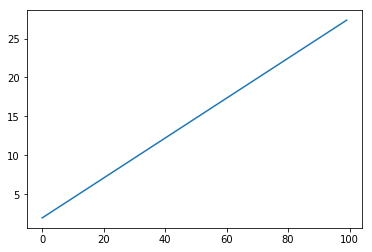

In [10]:
plt.plot(yy)

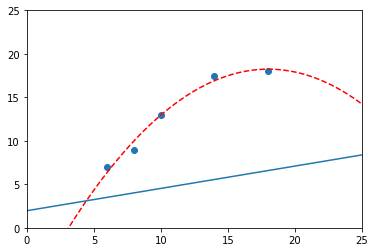

In [14]:
pf = PolynomialFeatures(degree = 2)
x_train_pf = pf.fit_transform(x_train.reshape(-1,1))
x_test_pf = pf.transform(x_test.reshape(-1,1))
lr = LinearRegression()
lr.fit(x_train_pf, y_train)
xx_pf = pf.transform(xx.reshape(-1,1))
plt.plot( xx, lr.predict(xx_pf), c='r', linestyle = '--' )
plt.axis([0,25,0,25])
plt.plot(yy)
plt.scatter(x_train, y_train)

In [18]:
model.score(x_test.reshape(-1,1), y_test)

0.80972679770766498

In [15]:
lr.score(x_test_pf, y_test)

0.86754436563450732

In [22]:
df = pd.read_csv('E:\\MySQL_data\\winequality-red.csv', sep=';')

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


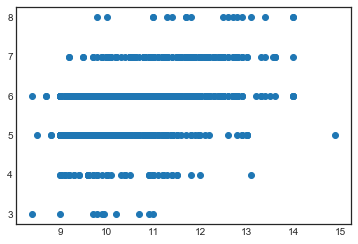

In [25]:
sns.set_style('white')
plt.scatter( df['alcohol'], df['quality'])

In [29]:
df[['alcohol','quality']].corr() # 它们的相关性不到一半

,alcohol,quality
alcohol,1.000000,0.476166
quality,0.476166,1.000000


In [31]:
x = df.iloc[:,:-1]
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_prediction = lr.predict(x_test)
lr.score(x_test, y_test) # R-squared

0.40914607557082328

In [35]:
cross_val_score( lr, x, y, cv=5 ).mean()

0.29004162884219686

In [36]:
for i, j in zip(y_prediction[:10], y_test[:10]):
    print('Predicted', i, 'True', j)

Predicted 6.08249383795 True 5
Predicted 5.78692240934 True 6
Predicted 5.47097693465 True 5
Predicted 5.50593060757 True 5
Predicted 4.99177397557 True 6
Predicted 6.21699863849 True 5
Predicted 5.58674522699 True 5
Predicted 5.87207378659 True 7
Predicted 5.80312024909 True 5
Predicted 5.21760727728 True 5


Text(0,0.5,'Prediction Quality')

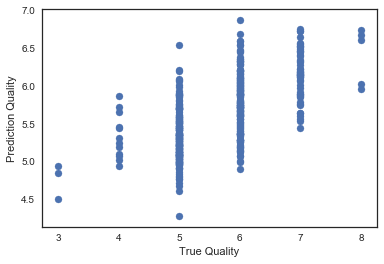

In [39]:
sns.set(style = 'white')
plt.scatter(y_test, y_prediction)
plt.xlabel('True Quality')
plt.ylabel('Prediction Quality')

In [107]:
data = load_boston()
x_train, x_test, y_train, y_test = train_test_split( data.data, data.target )

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1,1))

x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform( y_test.reshape(-1,1) )

sgdr = SGDRegressor(loss='squared_loss', max_iter=1000, tol = 1e-3 )
scores = cross_val_score(sgdr, x_train, y_train.reshape(-1,), cv=5 )

scores.mean()

0.71863149066001142

In [103]:
sgdr.fit(x_train, y_train.reshape(-1,))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [104]:
sgdr.score(x_test, y_test.reshape(-1,) )

0.78419537287844987